Underfitting: High bias
Overfitting: High variance

Bias and variance

Bias: Difference prediction/actual values of trainng data
Variance: difference prediction of training data vs prediction validation data

Giala is to have low bias and low variancw

TRain/Validation/Test Data..... hyperparameters

live shiny-app


Resampling: 
k-fold cross validation
leave one out cross validation --higher computationer effort but more stable result... ptobably not sustainable expecially when we get to deep learning.




1. Decision Tree: 

In [37]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [27]:
diabetes = pd.read_csv('diabetes.csv')
diabetes
diabetes.describe()
corr = diabetes.corr()

<AxesSubplot:>

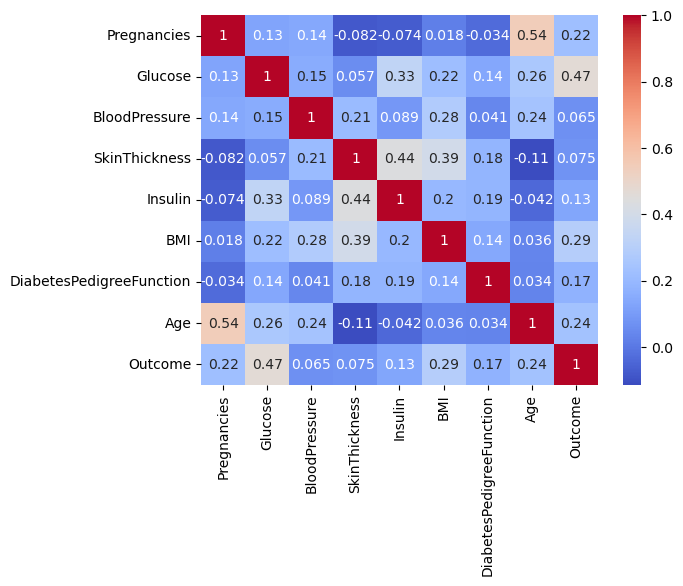

In [28]:
sns.heatmap(corr, cmap='coolwarm', annot=True)



In [29]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
# Seperating independen / dependent variable(s)
x = diabetes.drop(['Outcome'],axis=1)
y = diabetes['Outcome']

##Train / Test  SPlit
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [31]:
## Scaling features
steps = [
    ('scaler', StandardScaler()),
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42, bootstrap=True))
]

pipeline = Pipeline(steps)



pipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('decision_tree', DecisionTreeClassifier())])

In [32]:
y_pred_test = pipeline.predict(x_test)

<AxesSubplot:>

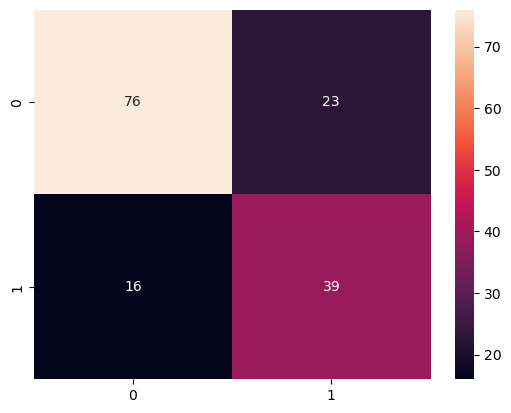

In [34]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred_test),annot=True)


In [36]:
accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.7467532467532467

In [ ]:
feat_importances = pd.Series(pipeline.steps[1][1].feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')